# Human Image recognizer based on emotion

In [1]:
# import required packages
import cv2
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        'test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

# Train the neural network/model
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

# save model structure in jason file
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    
    json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('emotion_model.h5')

Found 28709 images belonging to 7 classes.
Found 7190 images belonging to 7 classes.
Epoch 1/100
448/448 [==============================] - 278s 618ms/step - loss: 1.8061 - accuracy: 0.2556 - val_loss: 1.7392 - val_accuracy: 0.3251
Epoch 2/100
448/448 [==============================] - 131s 292ms/step - loss: 1.6416 - accuracy: 0.3533 - val_loss: 1.5604 - val_accuracy: 0.4061
Epoch 3/100
448/448 [==============================] - 128s 285ms/step - loss: 1.5394 - accuracy: 0.4072 - val_loss: 1.4958 - val_accuracy: 0.4233
Epoch 4/100
448/448 [==============================] - 124s 277ms/step - loss: 1.4667 - accuracy: 0.4376 - val_loss: 1.4151 - val_accuracy: 0.4604
Epoch 5/100
448/448 [==============================] - 133s 296ms/step - loss: 1.4064 - accuracy: 0.4644 - val_loss: 1.3672 - val_accuracy: 0.4827
Epoch 6/100
448/448 [==============================] - 141s 315ms/step - loss: 1.3570 - accuracy: 0.4855 - val_loss: 1.3246 - val_accuracy: 0.4980
Epoch 7/100
448/448 [============

Epoch 56/100
448/448 [==============================] - 124s 277ms/step - loss: 0.3323 - accuracy: 0.8805 - val_loss: 1.2774 - val_accuracy: 0.6243
Epoch 57/100
448/448 [==============================] - 124s 276ms/step - loss: 0.3147 - accuracy: 0.8879 - val_loss: 1.2845 - val_accuracy: 0.6285
Epoch 58/100
448/448 [==============================] - 125s 278ms/step - loss: 0.3230 - accuracy: 0.8848 - val_loss: 1.2808 - val_accuracy: 0.6230
Epoch 59/100
448/448 [==============================] - 124s 277ms/step - loss: 0.3007 - accuracy: 0.8924 - val_loss: 1.3004 - val_accuracy: 0.6275
Epoch 60/100
448/448 [==============================] - 123s 275ms/step - loss: 0.2982 - accuracy: 0.8929 - val_loss: 1.3210 - val_accuracy: 0.6187
Epoch 61/100
448/448 [==============================] - 124s 277ms/step - loss: 0.2898 - accuracy: 0.8962 - val_loss: 1.3152 - val_accuracy: 0.6283
Epoch 62/100
448/448 [==============================] - 124s 276ms/step - loss: 0.2817 - accuracy: 0.8999 - val_

In [6]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [7]:
emotion =  emotion_model_info.history
emotion.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

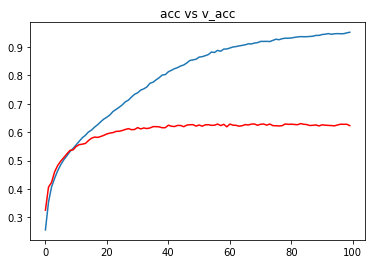

In [8]:
import matplotlib.pyplot as plt
plt.plot(emotion['accuracy'])
plt.plot(emotion['val_accuracy'] , c = "red")
plt.title("acc vs v_acc")
plt.show()

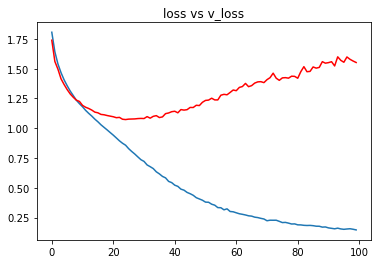

In [9]:
plt.plot(emotion['loss'])
plt.plot(emotion['val_loss'] , c = "red")
plt.title("loss vs v_loss")
plt.show()